In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
# 下载Iris数据集
iris = load_iris()

X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# 初始化逻辑回归模型
model = LogisticRegression(penalty='l1', solver='liblinear',max_iter=10000)
# 训练模型
model.fit(X_train, y_train)
# 预测测试集
y_pred = model.predict(X_test)
# 通过交叉验证计算准确率
# cv参数表示将数据集分为几折
scores = cross_val_score(model, X, y, cv=10)
# 打印平均准确率
print("平均准确率:", scores.mean())

平均准确率: 0.9600000000000002


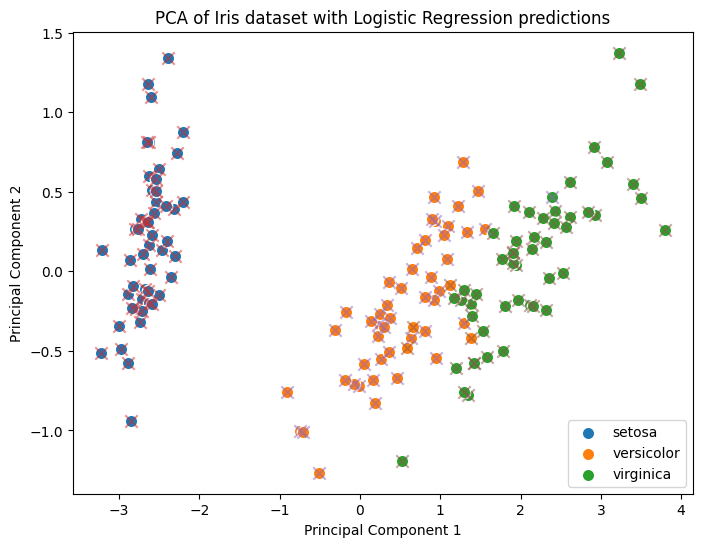

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 使用PCA将数据降维到二维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 使用训练好的模型进行预测
y_pred_all = model.predict(X)

# 绘制所有样本的散点图
plt.figure(figsize=(8, 6))

for i in range(len(iris.target_names)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=iris.target_names[i], edgecolors='w', s=80)

# 绘制测试集的预测结果
for i in range(len(iris.target_names)):
    plt.scatter(X_pca[y_pred_all == i, 0], X_pca[y_pred_all == i, 1], marker='x', s=80, alpha=0.5)

plt.title('PCA of Iris dataset with Logistic Regression predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
